# IMPORTING LIBRARIES AND READING DATA

In [250]:
# importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing label encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# import logistic regression, ridge classifier, decision tree
# gaussian naive bayes, mlp clasifier and random forest models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# import classification report function
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter ( action = "ignore")

In [303]:
df = pd.read_csv("country_comparison_large_dataset.csv")

In [252]:
df.head() # first 5 line of df

,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,USA,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,...,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,...,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,...,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,...,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,...,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65


In [253]:
df.info() # info about df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         144 non-null    object 
 1   Year                                            144 non-null    int64  
 2   GDP (in Trillions USD)                          144 non-null    float64
 3   GDP per Capita (in USD)                         144 non-null    float64
 4   Inflation Rate (%)                              144 non-null    float64
 5   Population (in Millions)                        144 non-null    float64
 6   Population Growth Rate (%)                      144 non-null    float64
 7   Urban Population (%)                            144 non-null    float64
 8   Life Expectancy (Years)                         144 non-null    float64
 9   Healthcare Expenditure per Capita (USD)    

# DATA FEATURES

In [254]:
df.isna().sum() # checking for is there any null values

Country                                           0
Year                                              0
GDP (in Trillions USD)                            0
GDP per Capita (in USD)                           0
Inflation Rate (%)                                0
Population (in Millions)                          0
Population Growth Rate (%)                        0
Urban Population (%)                              0
Life Expectancy (Years)                           0
Healthcare Expenditure per Capita (USD)           0
Doctor-to-Patient Ratio                           0
Literacy Rate (%)                                 0
Education Expenditure as % of GDP                 0
Internet Penetration (%)                          0
Smartphone Adoption (%)                           0
Energy Consumption (TWh)                          0
Renewable Energy Share (%)                        0
Military Expenditure (in Billion USD)             0
Number of Active Military Personnel               0
CO2 Emission

In [255]:
df.duplicated().sum()  # gives unique lines -> output 0 means that every row in your DataFrame is unique, 1 is not


0

In [256]:
df.Country.unique() # which countries are there in the set

array(['USA', 'Russia', 'Canada', 'China', 'India', 'Australia'],
      dtype=object)

In [257]:
df.Country.nunique() # how many countries are there in the set

6

In [258]:
df.Year.unique() # gives the years in the set has data

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

In [259]:
df.Year.nunique() # how many years in the set has data 

24

In [260]:
df["Population (in Millions)"].describe() # description of the "Population (in Millions)" column

count     144.000000
mean      550.913542
std       600.169798
min        23.900000
25%        37.342500
50%       233.770000
75%      1341.540000
max      1462.310000
Name: Population (in Millions), dtype: float64

# FINDING CORRELATIONS BETWEEN DATA FEATURES

In [261]:
# automatic numeric column selection
numerical_df = df.select_dtypes(include=[float, int])

# correlation matrix calculation
corr_matrix = numerical_df.corr()

In [262]:
print(corr_matrix)  # correlation matrix

                                                    Year  \
Year                                            1.000000   
GDP (in Trillions USD)                          0.002383   
GDP per Capita (in USD)                        -0.008174   
Inflation Rate (%)                              0.000900   
Population (in Millions)                        0.000348   
Population Growth Rate (%)                     -0.000253   
Urban Population (%)                            0.006917   
Life Expectancy (Years)                        -0.003196   
Healthcare Expenditure per Capita (USD)         0.000869   
Doctor-to-Patient Ratio                         0.009554   
Literacy Rate (%)                               0.028743   
Education Expenditure as % of GDP              -0.000765   
Internet Penetration (%)                       -0.000727   
Smartphone Adoption (%)                         0.006620   
Energy Consumption (TWh)                       -0.002385   
Renewable Energy Share (%)              

In [298]:
df_corr = df_corr.corr()

- The "corr()" function in Pandas calculates the correlation between numerical data in a DataFrame.
- This process results in a matrix containing Pearson correlation coefficients between each column of the DataFrame.
- The Pearson correlation coefficient measures the linear relationship between two variables.

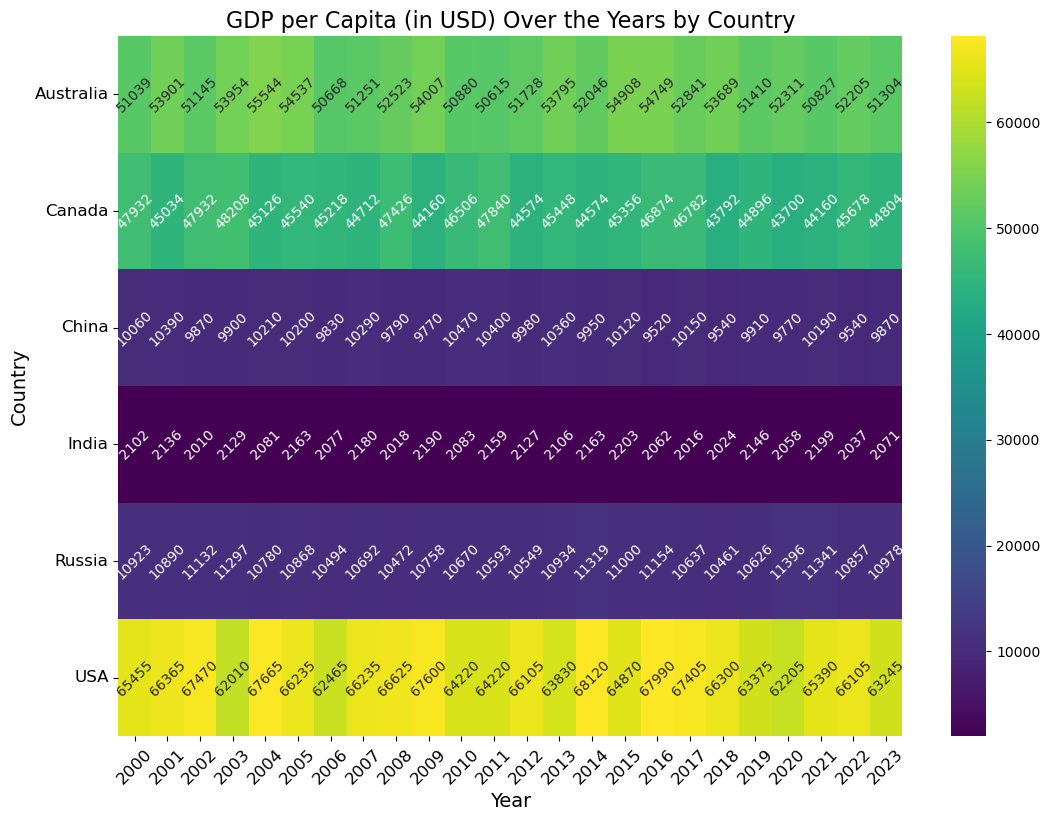

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('country_comparison_large_dataset.csv')

# Create a pivot table using keyword arguments
pivot_table = df.pivot(index='Country', columns='Year', values='GDP per Capita (in USD)')

# Plot
plt.figure(figsize=(14, 10))  # Increased figure size for better readability
ax = sns.heatmap(pivot_table, cmap='viridis', annot=True, cbar=True, fmt='.0f', annot_kws={"size": 10})

# Rotate annotations inside the heatmap cells
for text in ax.texts:
    text.set_rotation(45)
    text.set_fontsize(10)

plt.title('GDP per Capita (in USD) Over the Years by Country', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# Adjust layout to make sure everything fits without overlap
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.85, top=0.85)

plt.show()


GDP per capita is the economic value that the average person in a country produces or has a share in its production in a year.
- Among the countries in the dataset, the highest value is USA, followed by Australia. The lowest value is India.

In [264]:
df.describe() # describing the data frame

,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),Doctor-to-Patient Ratio,...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.00000,144.000000,144.000000,144.000000
mean,2011.500000,7.186667,31118.720139,2.653125,550.913542,0.702153,69.617222,77.323194,3747.403819,2.598194,...,10.975139,35.271806,82.536458,38.506458,4.980833,61.001181,474.94375,55.235347,92.348403,70.296736
std,6.946348,7.807163,24438.786379,1.067940,600.169798,0.417256,17.862888,5.411696,3914.846503,1.029520,...,5.885337,27.234486,69.991391,20.921471,1.327104,5.520543,292.35926,18.662935,65.630659,10.602064
min,2000.000000,1.270000,2009.700000,1.440000,23.900000,0.100000,33.600000,66.140000,69.420000,0.860000,...,1.910000,8.970000,26.850000,6.730000,3.430000,47.700000,95.30000,28.560000,15.280000,57.240000
25%,2005.750000,1.630000,9972.500000,1.887500,37.342500,0.300000,59.940000,73.042500,447.750000,1.810000,...,9.317500,10.960000,29.812500,13.010000,3.735000,59.340000,250.43750,40.070000,25.137500,63.420000
50%,2011.500000,2.275000,27548.000000,2.330000,233.770000,0.745000,77.330000,78.020000,2747.700000,2.735000,...,10.040000,23.370000,46.995000,48.140000,4.760000,62.230000,395.35000,54.820000,90.220000,67.615000
75%,2017.250000,14.232500,52231.500000,3.072500,1341.540000,1.010000,83.110000,81.715000,5379.400000,3.417500,...,12.360000,64.625000,120.870000,55.090000,5.517500,65.112500,796.40000,73.410000,150.337500,71.192500
max,2023.000000,22.240000,68120.000000,5.040000,1462.310000,1.360000,90.040000,87.150000,11528.000000,4.200000,...,22.970000,83.600000,230.340000,62.940000,7.870000,69.230000,943.20000,80.850000,185.320000,96.600000


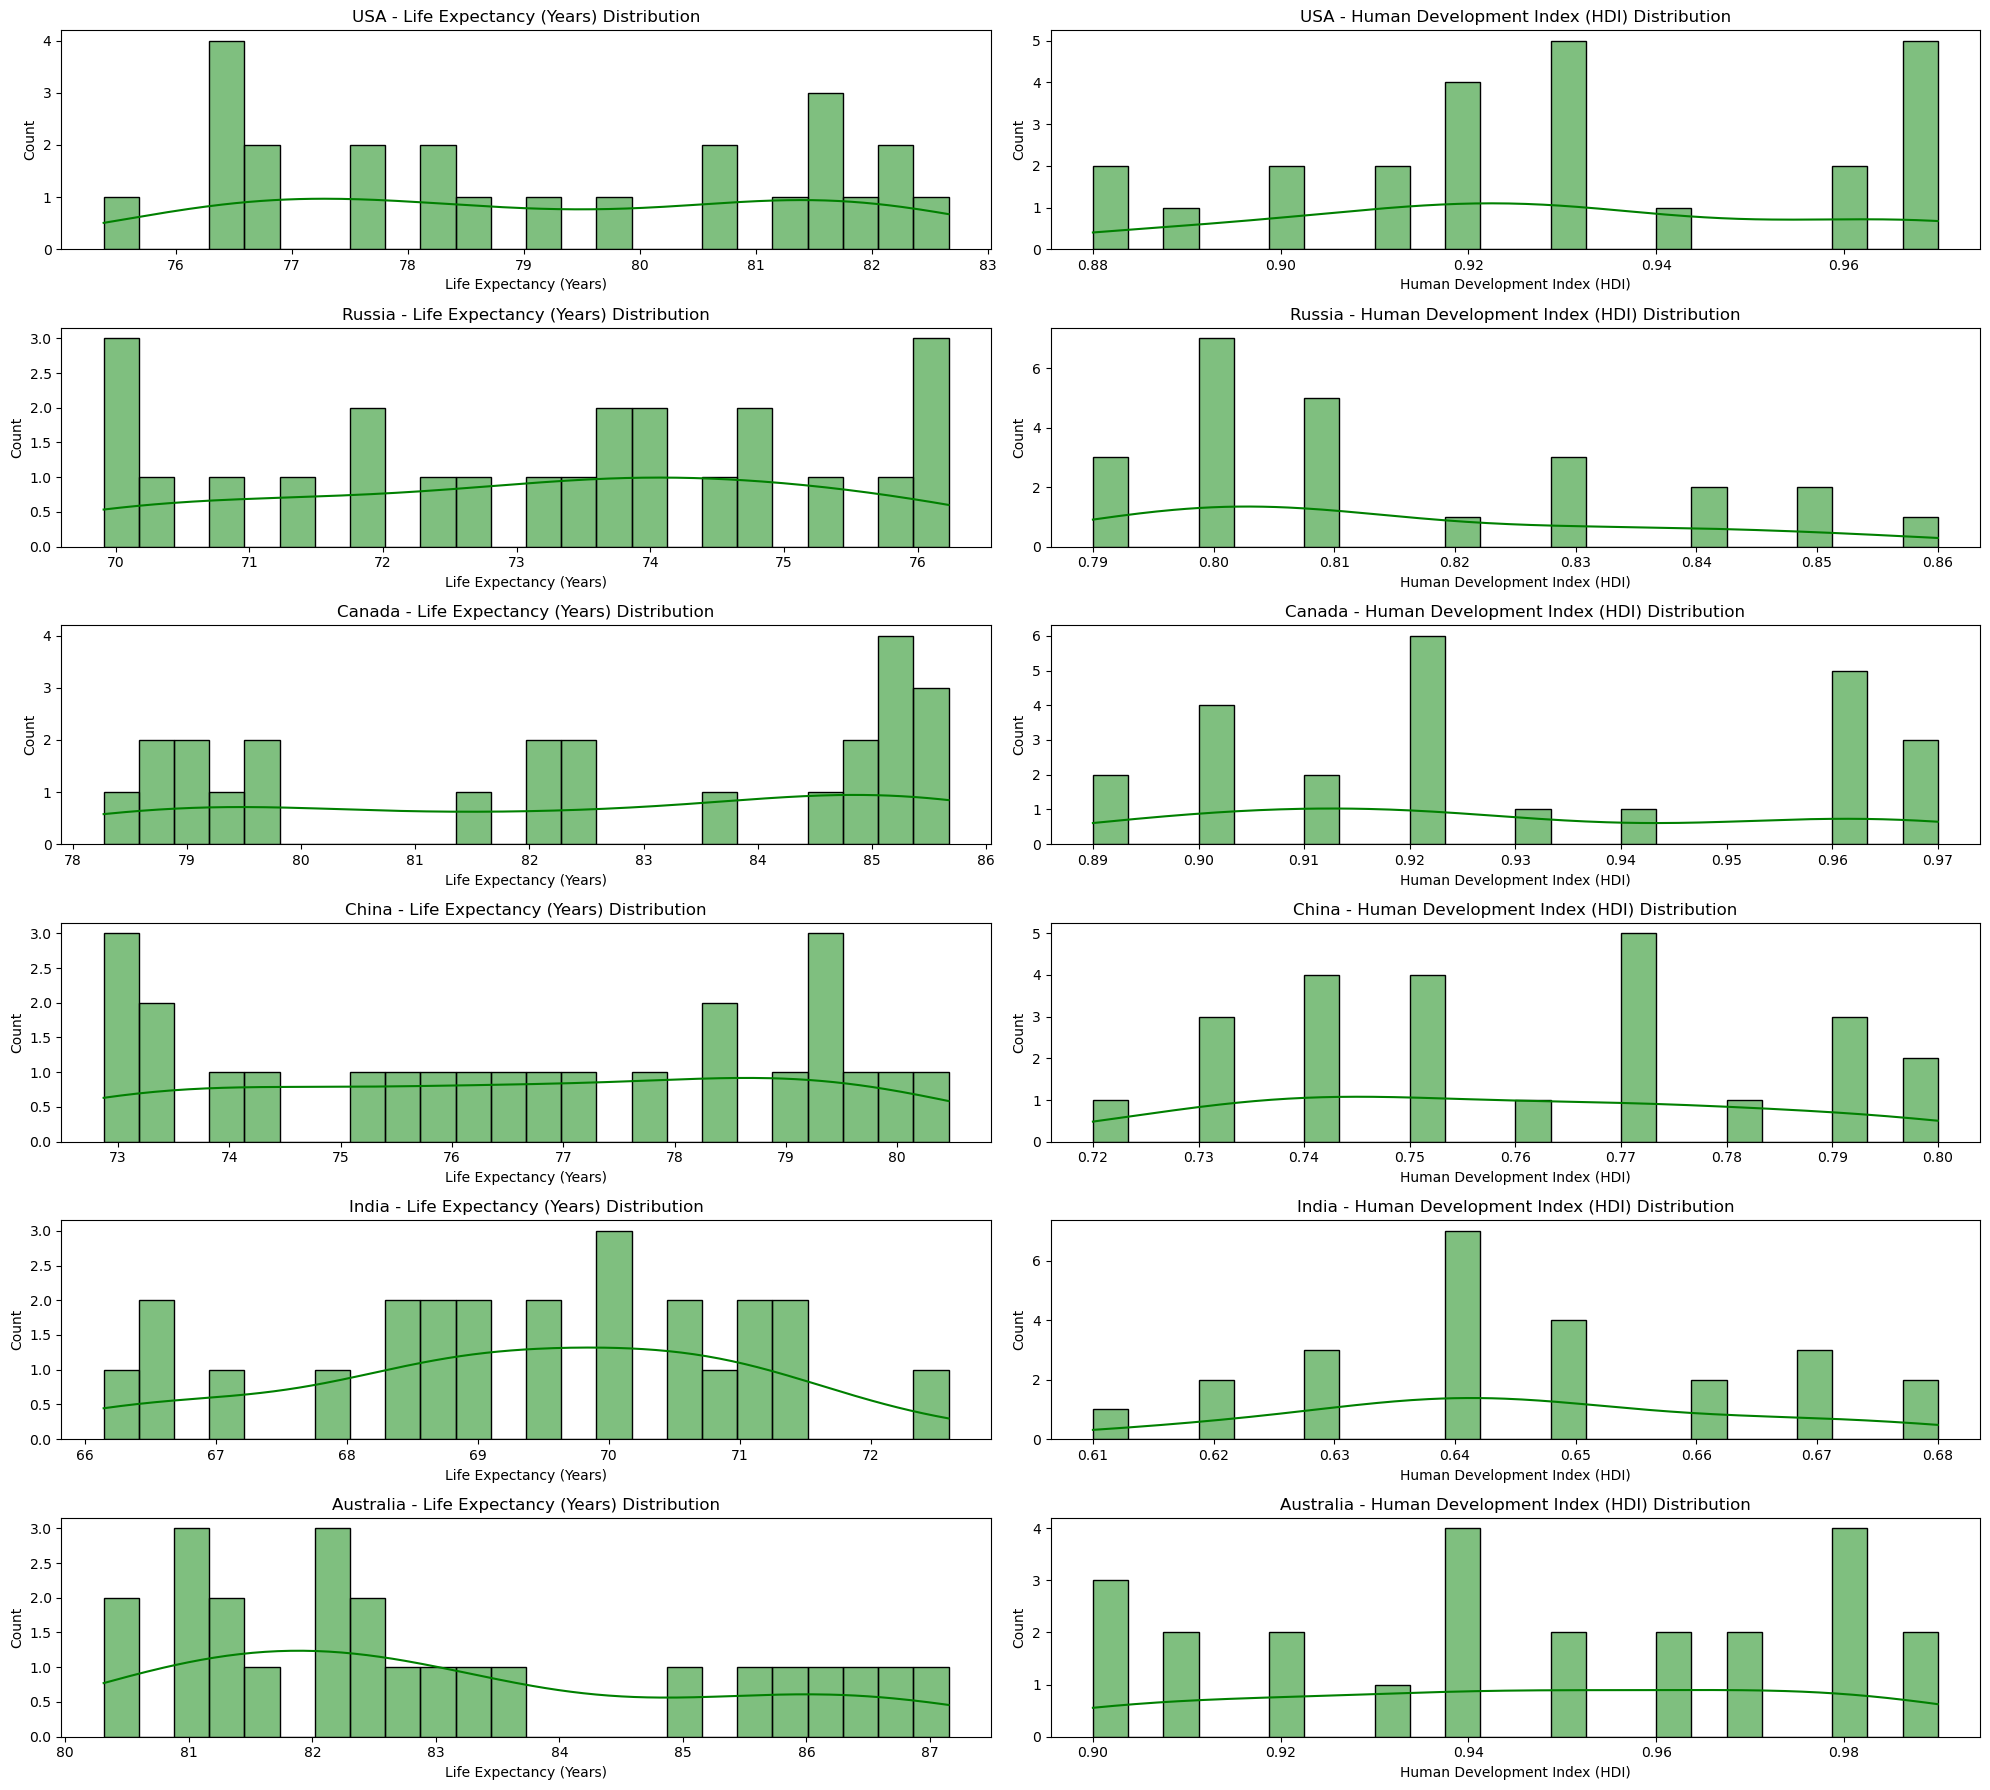

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt


countries = df['Country'].unique() # assigned to variable to plot by country

plt.figure(figsize=(20, 18)) # size of the graph

# columns to plot
columns = ['Life Expectancy (Years)', "Human Development Index (HDI)"]

# subplot for every country in the set
for i, country in enumerate(countries):
    for j, col in enumerate(columns):
        plt.subplot(len(countries), len(columns), i * len(columns) + j + 1)
        sns.histplot(data=df[df['Country'] == country], 
                     x=col, 
                     kde=True, 
                     bins=24, 
                     color='green')
        plt.title(f'{country} - {col} Distribution')


plt.tight_layout()
plt.show() 

Life Expectancy (Years) and HDI distribution are given for countries

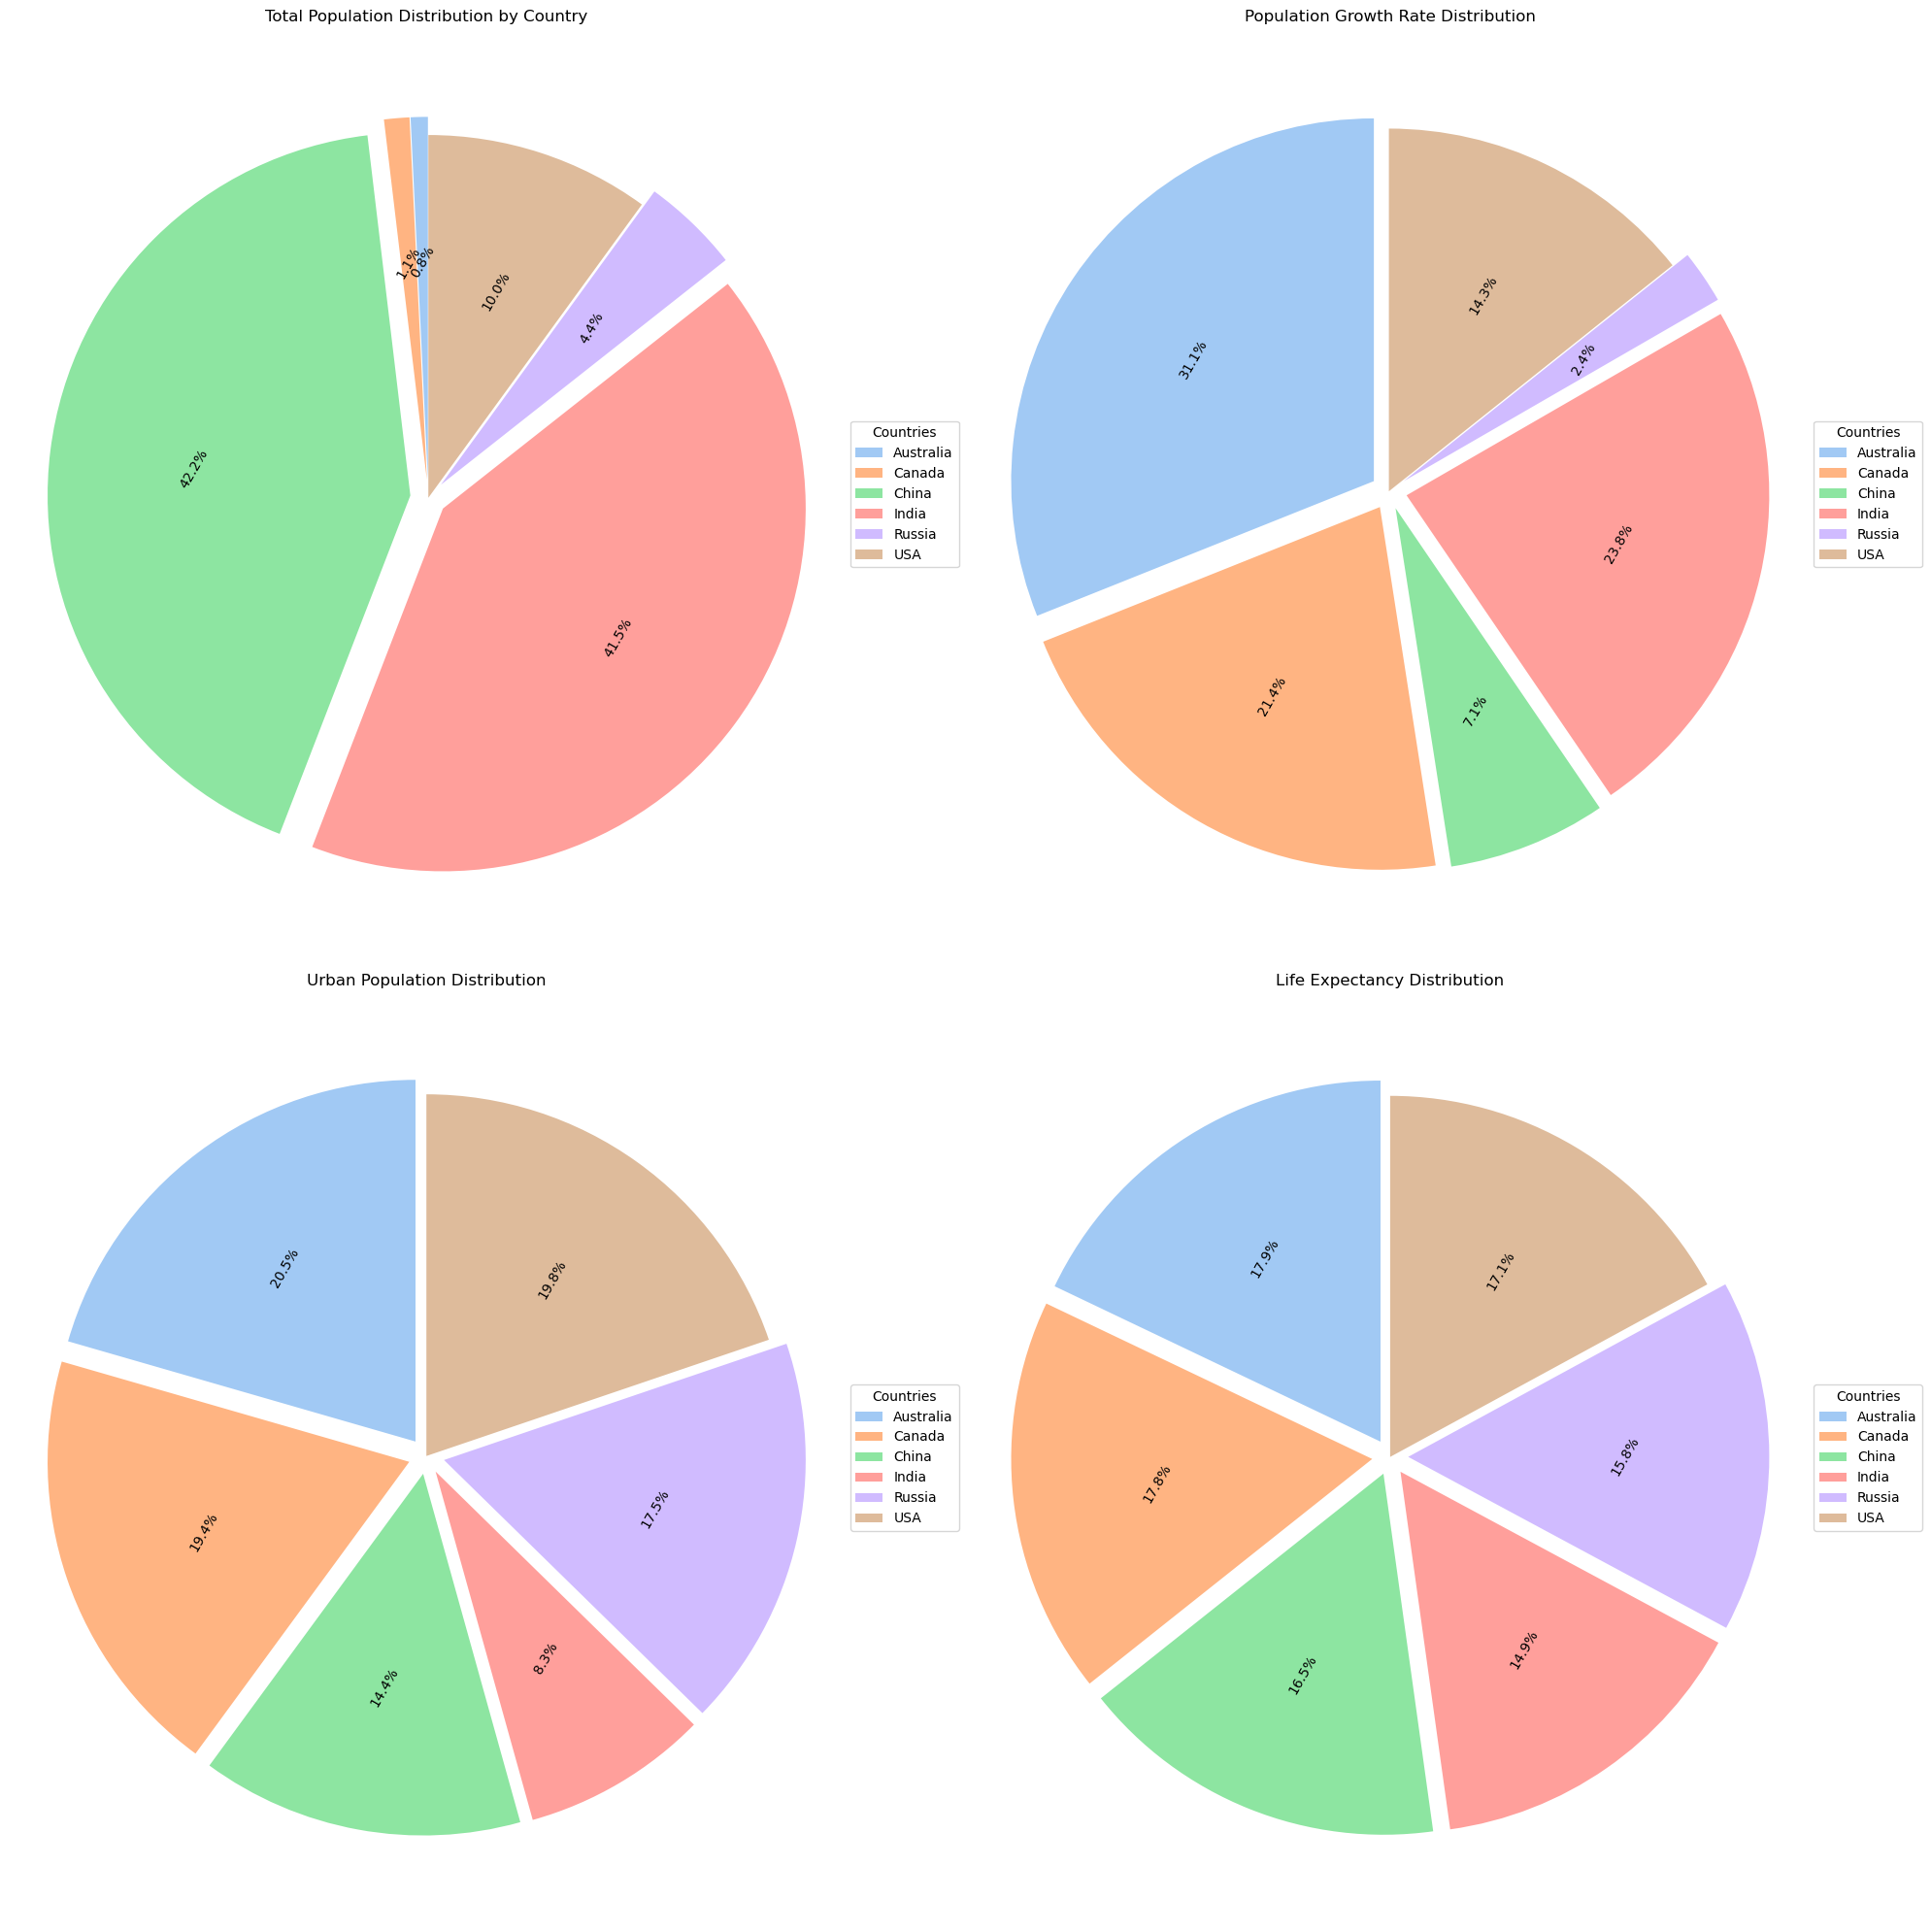

In [266]:
# calculating the total values ​​for each country's respective columns
population_per_country = df.groupby('Country')['Population (in Millions)'].sum()
growth_rate_per_country = df.groupby('Country')['Population Growth Rate (%)'].mean()
urban_population_per_country = df.groupby('Country')['Urban Population (%)'].mean()
life_expectancy_per_country = df.groupby('Country')['Life Expectancy (Years)'].mean()

# exploding pie pieces
explode = [0.05 if i < 5 else 0 for i in range(len(population_per_country))]

# setting color palette
colors = sns.color_palette('pastel', len(population_per_country))


plt.figure(figsize=(20, 20))

# 1st graph: Total Population Distribution by Country
plt.subplot(2, 2, 1)
wedges, texts, autotexts = plt.pie(population_per_country, 
                                   autopct='%1.1f%%',  
                                   startangle=90, 
                                   explode=explode,  
                                   colors=colors)

# rotating 60 degrees to read values
for autotext in autotexts:
    autotext.set_rotation(60)

# adding legend
plt.legend(wedges, population_per_country.index, title="Countries", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Total Population Distribution by Country')
plt.axis('equal')  

# 2nd graph: Population Growth Rate Distribution
plt.subplot(2, 2, 2)
wedges, texts, autotexts = plt.pie(growth_rate_per_country, 
                                   autopct='%1.1f%%',  
                                   startangle=90, 
                                   explode=explode,  
                                   colors=colors)

# rotating 60 degrees to read values
for autotext in autotexts:
    autotext.set_rotation(60)

# adding legend
plt.legend(wedges, growth_rate_per_country.index, title="Countries", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Population Growth Rate Distribution')
plt.axis('equal')  

# 3rd graph: Urban Population Distribution
plt.subplot(2, 2, 3)
wedges, texts, autotexts = plt.pie(urban_population_per_country, 
                                   autopct='%1.1f%%',  
                                   startangle=90, 
                                   explode=explode,  
                                   colors=colors)

# rotating 60 degrees to read values
for autotext in autotexts:
    autotext.set_rotation(60)

# adding legend
plt.legend(wedges, urban_population_per_country.index, title="Countries", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Urban Population Distribution')
plt.axis('equal')  

# 4th graph: Life Expectancy Distribution
plt.subplot(2, 2, 4)
wedges, texts, autotexts = plt.pie(life_expectancy_per_country, 
                                   autopct='%1.1f%%',  
                                   startangle=90, 
                                   explode=explode,  
                                   colors=colors)

# rotating 60 degrees to read values
for autotext in autotexts:
    autotext.set_rotation(60)

# adding legend
plt.legend(wedges, life_expectancy_per_country.index, title="Countries", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Life Expectancy Distribution')
plt.axis('equal')  

# tighting graphs
plt.tight_layout()
plt.show()


- In countries with high values ​​in total population distribution, there are countries with serious decreases in population growth rates and countries with parallel progress. For example, India has progressed parallel. 
- India had the lowest GDP per capita value above. Urban population and life expectancy values ​​are the lowest among other countries. The highest GDP per capita value belonged to the USA. Population distribution and growth rate values ​​are relatively low, while urban population and life expectancy values ​​are high.
- As total population distribution and population growth rate increase, urban population value and life expectancy values ​​decrease. Countries in this situation are also falling behind in terms of trade.

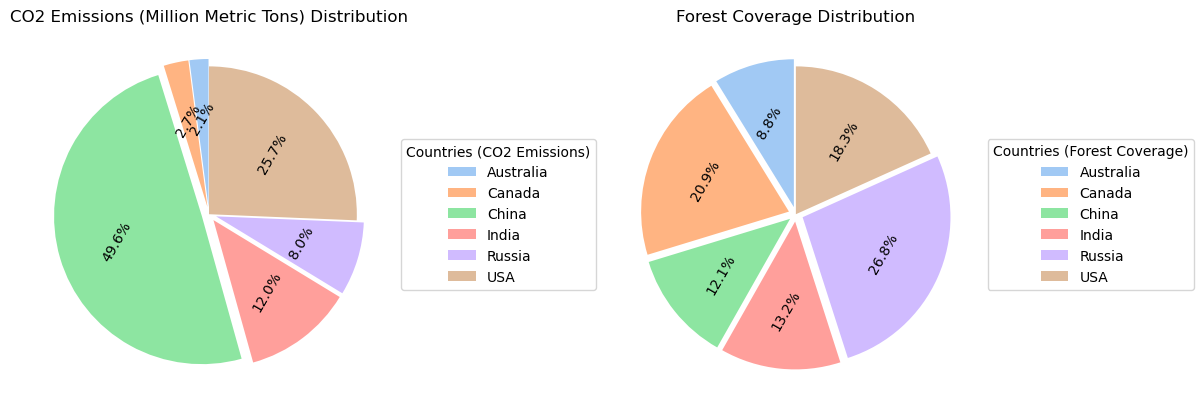

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculatiing total CO2 Emissions and Forest Coverage for each country
export_per_country = df.groupby('Country')['CO2 Emissions (Million Metric Tons)'].sum()
import_per_country = df.groupby('Country')['Forest Coverage (%)'].sum()

# setting color palette
colors_export = sns.color_palette('pastel', len(export_per_country))
colors_import = sns.color_palette('pastel', len(import_per_country))

# pie chart for CO2 Emissions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # first subplot (1 row, 2 columns, 1st chart)
wedges, texts, autotexts = plt.pie(export_per_country, 
                                   autopct='%1.1f%%',  # percentage
                                   startangle=90, 
                                   colors=colors_export,
                                   explode=[0.05 if i < 5 else 0 for i in range(len(export_per_country))])
# rotating 60 degrees to read values
for autotext in autotexts:
    autotext.set_rotation(60)

# adding legend (description)
plt.legend(wedges, export_per_country.index, title="Countries (CO2 Emissions)", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('CO2 Emissions (Million Metric Tons) Distribution')

# pie chart for Forest Coverage
plt.subplot(1, 2, 2)  # second subplot (1 row, 2 columns, 2nd chart)
wedges, texts, autotexts = plt.pie(import_per_country, 
                                   autopct='%1.1f%%',  # percentage
                                   startangle=90, 
                                   colors=colors_import,
                                   explode=[0.05 if i < 5 else 0 for i in range(len(import_per_country))])
# rotating 60 degrees to read values
for autotext in autotexts:
    autotext.set_rotation(60)

# adding legend (description)
plt.legend(wedges, import_per_country.index, title="Countries (Forest Coverage)", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Forest Coverage Distribution')

plt.tight_layout()  # placement so that two graphics do not stick together
plt.show()


- It can be observed in the graph that there is an inverse proportion between CO2 Emission value and forest coverage.

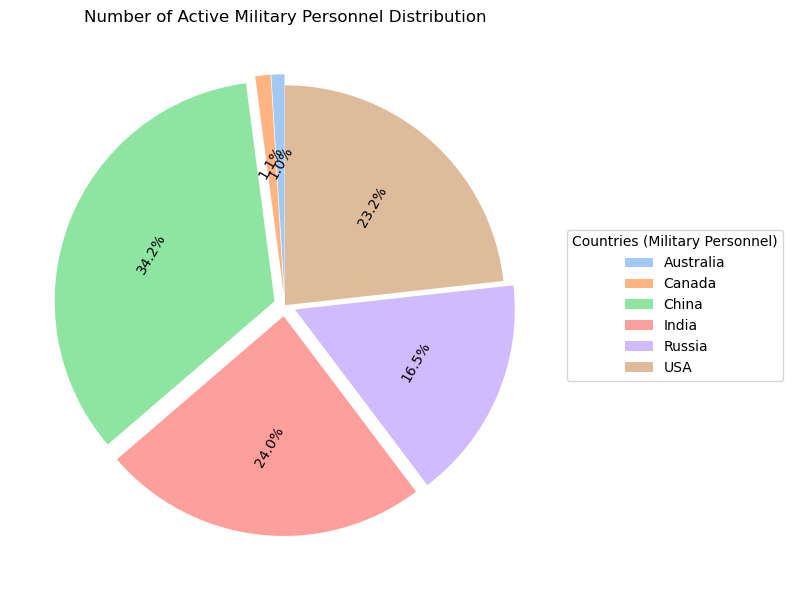

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of active soldiers of each country
military_personnel_per_country = df.groupby('Country')['Number of Active Military Personnel'].sum()

colors_military = sns.color_palette('pastel', len(military_personnel_per_country))

plt.figure(figsize=(10, 6))

wedges, texts, autotexts = plt.pie(military_personnel_per_country, 
                                   autopct='%1.1f%%',  # Yüzdelik gösterimi
                                   startangle=90, 
                                   colors=colors_military,
                                   explode=[0.05 if i < 5 else 0 for i in range(len(military_personnel_per_country))])

for autotext in autotexts:
    autotext.set_rotation(60)

plt.legend(wedges, military_personnel_per_country.index, title="Countries (Military Personnel)", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Number of Active Military Personnel Distribution')


plt.tight_layout()
plt.show()


- Distribution of active military personnel in countries is given.

# MULTIVARIATE ANALYSIS AND ASKING QUESTIONS ABOUT DATA

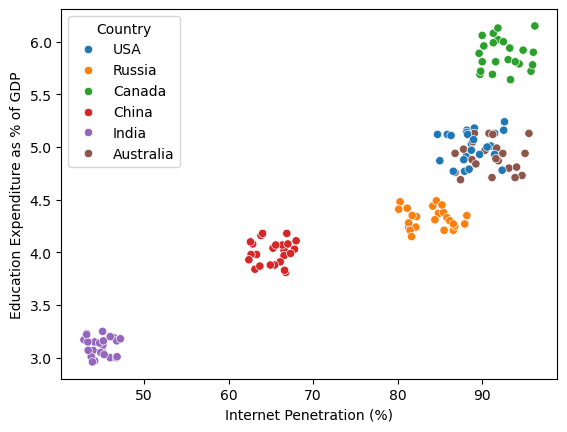

In [269]:
sns.scatterplot(data = df, x = "Internet Penetration (%)", y = "Education Expenditure as % of GDP", hue = "Country", palette='tab10')
plt.show()



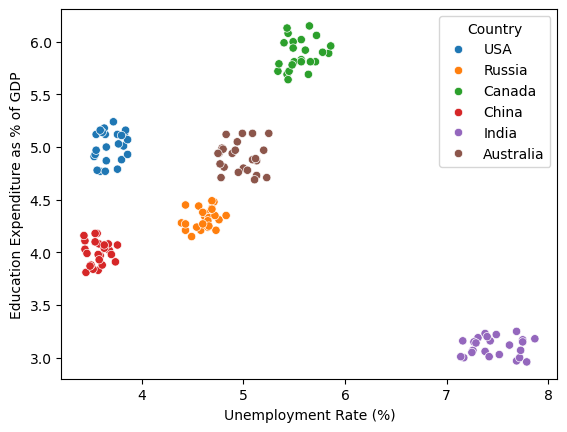

In [270]:
sns.scatterplot(data = df, x = "Unemployment Rate (%)", y = "Education Expenditure as % of GDP", hue = "Country", palette='tab10')
plt.show()


- As the Education Expenditure Percentage increases, the Internet Penetration percentage also increases. India has the lowest value, while Canada, USA, and Australia have the highest values.
- Unemployment rates are not the lowest in countries where the amount of money spent on education is high, but unemployment is the highest in India, where the amount of money spent on education is low.

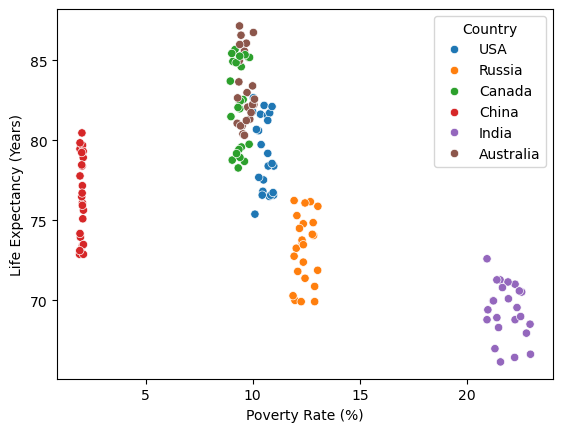

In [271]:
sns.scatterplot(data = df, x = "Poverty Rate (%)", y = "Life Expectancy (Years)", hue = "Country", palette='tab10')
plt.show()

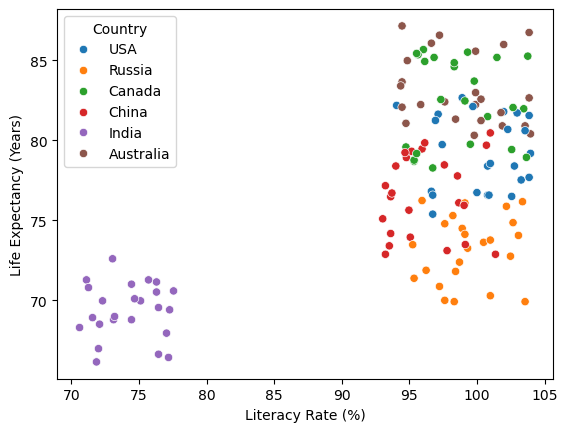

In [272]:
sns.scatterplot(data = df, x = "Literacy Rate (%)", y = "Life Expectancy (Years)", hue = "Country",  palette='tab10')
plt.show()

- As the poverty rate increases, life expectancy decreases. India, the country with the highest poverty rate, again draws attention. USA, Canada and Australia draw attention with the highest life expectancy values. 
- As the literacy rate increases, life expectancy also increases, in fact, there are aspects that are scattered and inconsistent with the first graph, but India again stands out from other countries in a striking way.

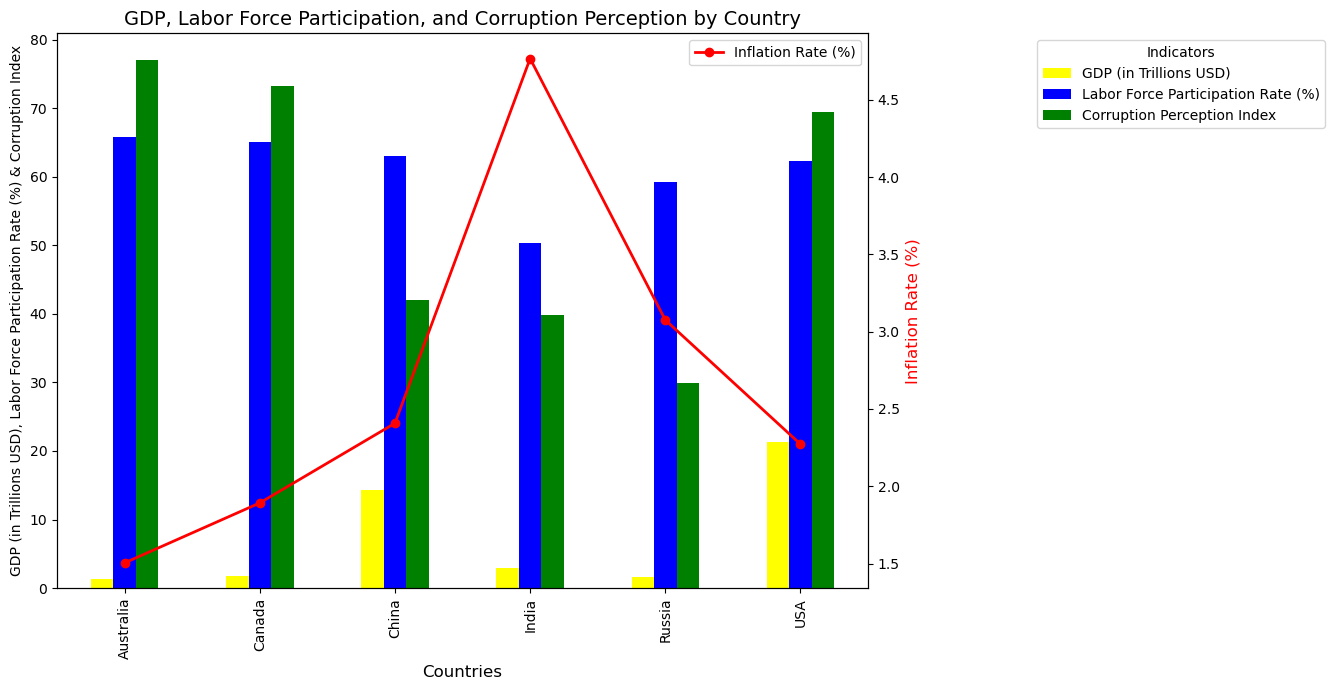

In [273]:
# graph size
fig, ax1 = plt.subplots(figsize=(14, 7))

# First chart (GDP, Labor Force Participation Rate and Corruption Perception Index) - Bar chart
df.groupby("Country")[["GDP (in Trillions USD)", "Labor Force Participation Rate (%)", "Corruption Perception Index"]].mean().plot(
    kind="bar", 
    color=['yellow', 'blue', 'green'], 
    align='center', 
    ax=ax1
)
# Labels and title for the first axis
ax1.set_ylabel('GDP (in Trillions USD), Labor Force Participation Rate (%) & Corruption Index', fontsize=10)
ax1.set_xlabel('Countries', fontsize=12)
ax1.set_title("GDP, Labor Force Participation, and Corruption Perception by Country", fontsize=14)
plt.legend(title="Indicators", bbox_to_anchor=(1.2, 1.0))

# Adding another axis for the second Y axis - Line plot
ax2 = ax1.twinx()
df.groupby("Country")[["Inflation Rate (%)"]].mean().plot(
    kind="line", 
    color='red', 
    marker='o', 
    ax=ax2, 
    linewidth=2
)

# Label for second axis
ax2.set_ylabel("Inflation Rate (%)", fontsize=12, color='red')

plt.tight_layout()

plt.show()


- When we look at the graph in general, there is a definite inverse proportion between the Corruption perception index and the labor force perception rate. In the inflation comparison, the lowest value is in Australia and the highest in India. GDP values ​​​​are independent of other variables.

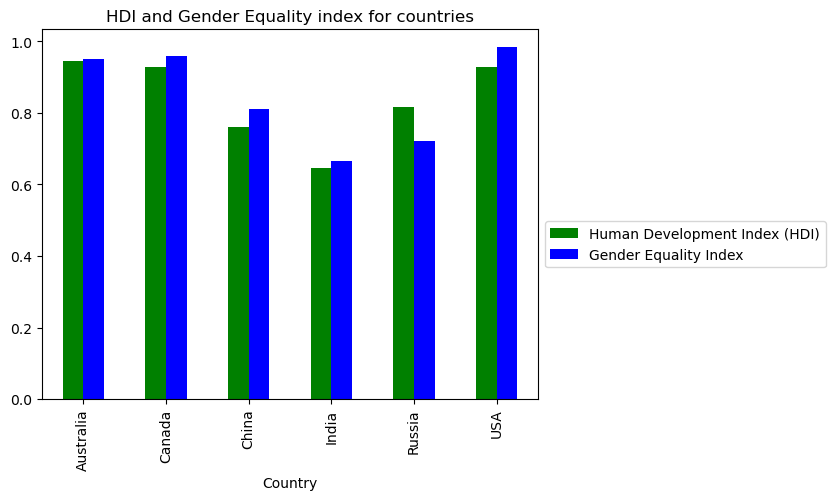

In [274]:
df.groupby("Country")[[ "Human Development Index (HDI)","Gender Equality Index"]].mean().plot(kind = "bar", color = [ 'green',"blue"], align = 'center')


plt.legend(bbox_to_anchor = (1.0, 0.5))
plt.title("HDI and Gender Equality index for countries")
plt.show()

- In countries with high gender equality index values, HDI values ​​are generally high. We can say that they are directly proportional to each other. Australia and USA again stand out with the highest values ​​and India with the lowest.

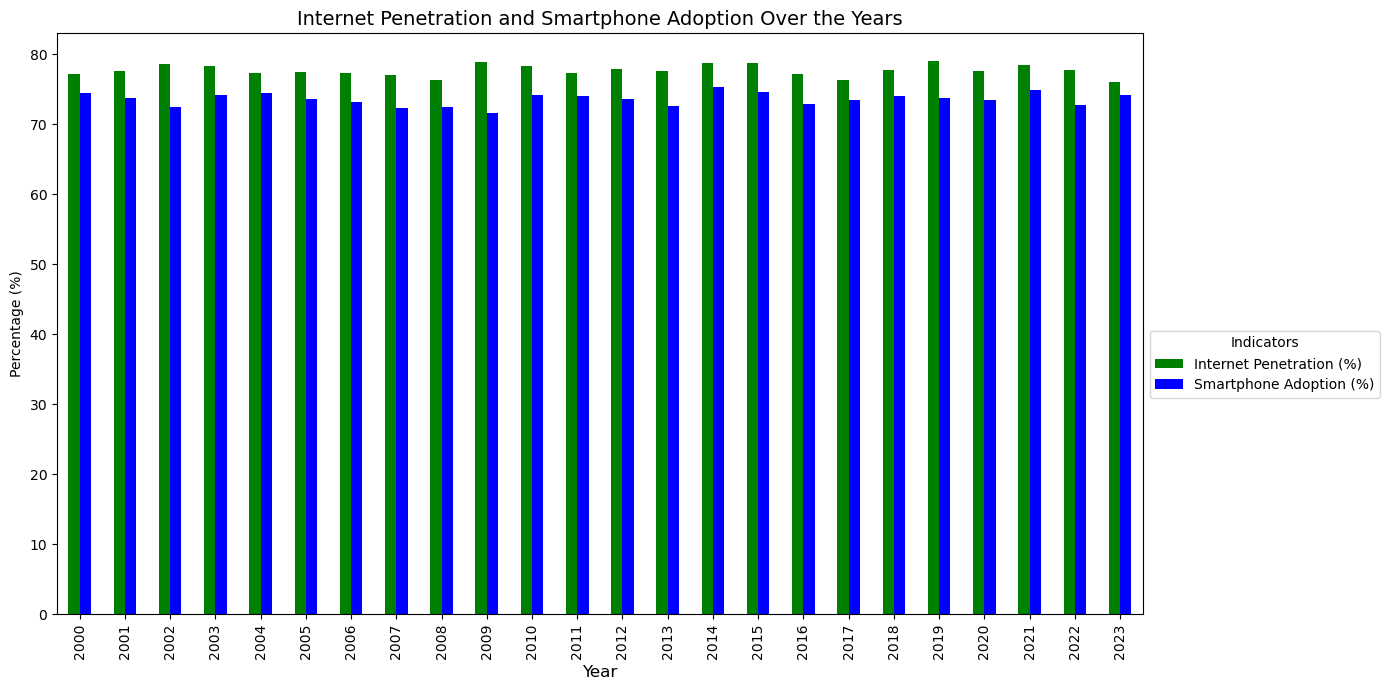

In [275]:
import matplotlib.pyplot as plt

# grapgh sizes
fig, ax1 = plt.subplots(figsize=(14, 7))

# group and plot data for bar chart
df.groupby("Year")[["Internet Penetration (%)", "Smartphone Adoption (%)"]].mean().plot(
    kind="bar", 
    color=['green', 'blue'], 
    align='center', 
    ax=ax1
)

# labels and title for the first axis
ax1.set_ylabel('Percentage (%)', fontsize=10)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_title("Internet Penetration and Smartphone Adoption Over the Years", fontsize=14)
ax1.legend(title="Indicators", bbox_to_anchor=(1.00, 0.5), loc='upper left')

plt.tight_layout()
plt.show()


- Internet penetration and smartphone adoption rates have progressed parallel to each other. No significant differences are observed to warrant comment.

# USING ONE HOT ENCODING: CONVERTING CATEGORICAL DATA INTO CLASSIFIED DATA

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         144 non-null    object 
 1   Year                                            144 non-null    int64  
 2   GDP (in Trillions USD)                          144 non-null    float64
 3   GDP per Capita (in USD)                         144 non-null    float64
 4   Inflation Rate (%)                              144 non-null    float64
 5   Population (in Millions)                        144 non-null    float64
 6   Population Growth Rate (%)                      144 non-null    float64
 7   Urban Population (%)                            144 non-null    float64
 8   Life Expectancy (Years)                         144 non-null    float64
 9   Healthcare Expenditure per Capita (USD)    

In [277]:
from sklearn.preprocessing import OneHotEncoder
ohe =OneHotEncoder()

**One-Hot Encoding** is a technique used in machine learning to convert categorical variables into a numerical format that can be used by algorithms. It transforms each category into a new binary column, where a "1" represents the presence of that category and "0" represents the absence.

For example, if you have a categorical feature like "Color" with values "Red," "Blue," and "Green," One-Hot Encoding will create three new columns: one for each color. Each row will have a "1" in the column corresponding to its color and "0" in the others.

One-Hot Encoding is useful because many machine learning algorithms require numerical input and cannot work directly with categorical data.

In [278]:
xd = ohe.fit_transform(df[ ["Country"] ]).toarray()

In [279]:
xd

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0.

In [280]:
xd = pd.DataFrame(xd)

In [281]:
xd.columns = ohe.get_feature_names_out()
xd

,Country_Australia,Country_Canada,Country_China,Country_India,Country_Russia,Country_USA
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
139,0.0,0.0,0.0,0.0,1.0,0.0
140,0.0,1.0,0.0,0.0,0.0,0.0
141,0.0,0.0,1.0,0.0,0.0,0.0
142,0.0,0.0,0.0,1.0,0.0,0.0


In [282]:
df = df.drop(columns=["Country"])
df.head()

,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),Doctor-to-Patient Ratio,...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,2.60,...,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,4.05,...,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,2.84,...,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,1.86,...,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,0.86,...,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65


In [283]:
y = df[[ 'Inflation Rate (%)']]  # dependent variable
x = df.drop([ 'Inflation Rate (%)']  , axis=1)  # independent variable




# TRAIN & TEST // SPLIT & SCALING

In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state = 35)

**Train and Test Split** is a process used to evaluate machine learning models. The data is divided into two sets: the **train set**, used to train the model, and the **test set**, used to assess how well the model generalizes to unseen data. This prevents overfitting, where the model performs well on the training data but poorly on new, real-world data.

**Scaling** ensures that numerical features have a consistent scale, usually by normalizing or standardizing them. Many machine learning algorithms are sensitive to the magnitude of input values, so scaling helps improve performance and training stability.

In [285]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# IMPORTING REGRESSION ALGORITHMS REQUIRED FOR MODEL SELECTION

In [286]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

**Regression algorithms** are used in machine learning to predict continuous outcomes based on input data. These models find the relationship between independent variables (features) and a dependent variable (target). Examples include **Linear Regression**, **Ridge Regression**, and **Random Forest Regression**.

The purpose of regression is to estimate numerical values like price, temperature, or sales. After training the model, its performance is evaluated on a **test set**. This helps determine how well the model generalizes to new data, guiding decision-making on model selection and improvements.

In [287]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


regressor.fit(x_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [288]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.1)  # setting alpha
ridge = Ridge(alpha=1.0)  # setting alpha 

lasso.fit(x_train_scaled, y_train)
ridge.fit(x_train_scaled, y_train)


Ridge()

In [289]:
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Elastic Net Regression": ElasticNet(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Bayesian Regression": BayesianRidge(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "KNN Regression": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor()
}

for name, regressor in regressors.items():
    try:
        regressor.fit(x_train_scaled, y_train)
        y_test_p = regressor.predict(x_test_scaled)
        test_r2 = r2_score(y_test, y_test_p)
        print(f"Model: {name.upper()}")
        print(f"Test R-Squared Score: {test_r2:.5f}\n")
        
        scores = cross_validate(regressor, x_train_scaled, y_train,
                                scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_absolute_percentage_error'],
                                cv=10, return_train_score=False)
        scores = pd.DataFrame(scores, index=range(1, 11))
        print(scores.iloc[:, 2:].mean().abs().apply("{:.5f}".format))
        print("\n############################################################################\n")
    except Exception as e:
        print(f"{name} error occurred in the model: {e}")


Model: LINEAR REGRESSION
Test R-Squared Score: 0.98907

test_r2                                    0.98427
test_neg_mean_absolute_error               0.09055
test_neg_mean_squared_error                0.01243
test_neg_mean_absolute_percentage_error    0.03620
dtype: object

############################################################################

Model: RIDGE REGRESSION
Test R-Squared Score: 0.99309

test_r2                                    0.98693
test_neg_mean_absolute_error               0.08309
test_neg_mean_squared_error                0.01009
test_neg_mean_absolute_percentage_error    0.03316
dtype: object

############################################################################

Model: LASSO REGRESSION
Test R-Squared Score: 0.96845

test_r2                                    0.93514
test_neg_mean_absolute_error               0.17452
test_neg_mean_squared_error                0.04763
test_neg_mean_absolute_percentage_error    0.07676
dtype: object

#####################

R-squared is a statistical measure that measures how well a regression model fits the observed data points. The R-squared value indicates how much of the variance in the dependent variable is explained by the independent variables. The R-squared value takes a value between 0 and 1.

- The closer the R-squared value is to 1, the better the model fits the observed data points.
- The closer the R-squared value is to 0, the worse the model fits the observed data points.

# CHOOSING SUPERVISED LEARNING MODEL

Supervised learning is a type of machine learning where the model is trained on labeled data. This means that each training example is paired with an output label. The goal is to learn a mapping from inputs to outputs so that the model can predict the output for new, unseen data. Supervised learning is used for tasks like classification (predicting categorical labels) and regression (predicting continuous values).

**Supervised learning** involves training a model on labeled data to make predictions or decisions based on that data.

- After the cross validation, the best performing model was the Ridge Regression model. Therefore, Ridge Regression hyperparameter optimization was performed.

# HYPERPARAMETER OPTIMIZATION

In [290]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from scipy.stats import uniform

**Hyperparameter optimization** is the process of finding the best set of hyperparameters for a machine learning model. Hyperparameters are external parameters, like learning rate or number of estimators, that control the model's behavior but are not learned from the data.

The goal of hyperparameter optimization is to improve model performance by selecting the most appropriate hyperparameters. Techniques like **Grid Search** and **Random Search** test different combinations to find the optimal settings, leading to better accuracy and generalization.

In [291]:
# param_dist dictionary holds the parameters of Ridge Regression
param_dist = {
              'alpha': uniform(0, 100),  # a uniform distribution for ridge regression alpha
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # solvers for ridge regression
              'tol': [1e-4, 1e-3, 1e-2],  # stopping tolerance of optimization algorithm
              'max_iter': [None, 100, 200]  # maximum number of iterations
              }

ridge = Ridge()

random_search = RandomizedSearchCV(estimator = ridge, param_distributions = param_dist, n_iter = 50, cv = 5, scoring = 'neg_mean_absolute_error', random_state = 42)
random_search.fit(x_train, y_train)

print("Best parameters: ", random_search.best_params_)
print("Best score (negative MSE): ", random_search.best_score_)

Best parameters:  {'alpha': 1.3264961159866528, 'max_iter': None, 'solver': 'lsqr', 'tol': 0.001}
Best score (negative MSE):  -0.08105620551834407


Let me explain the results you obtained as a result of the hyperparameter optimization you performed for Ridge Regression with `RandomizedSearchCV`

1. Best Parameters:
- `alpha`: 1.3264961159866528
- `alpha` in Ridge regression determines the regularization power of the model. Low `alpha` values ​​​​allow the model to be less regularized and therefore to adapt to more training data. High `alpha` values ​​​​allow the model to be more regularized and therefore to obtain a simpler and more general model. The best found `alpha` value here is approximately 1.33, which shows that the model has found a suitable balance for regularization.

- `solver`: 'lsqr'
- This is the solver method to be used in Ridge regression. `lsqr` is a solution algorithm for linear systems. This was selected as the one that provides the best performance.

- `tol`:0.001
- Determines the stopping tolerance of the optimization algorithm. The `tol` value indicates how sensitive the algorithm is to search for a result. A small `tol` value provides a more sensitive solution. The best result here is obtained with a tolerance value of 0.001.

- `max_iter`:None
- Determines the maximum number of iterations. The `None` value indicates that the number of iterations is unlimited and the algorithm will stop only to meet the tolerance condition. Here, the number of iterations is specified as unlimited, which allows the model to perform as many iterations as necessary.

2. Best Score (Negative MSE):-0.08105620551834407
- This value is the negative mean absolute error (MAE) score, which is one of the accuracy evaluation metrics of the model. It is expressed as negative because `RandomizedSearchCV` generally prefers maximum scores. Therefore, a positive MAE value indicates worse performance. Here the best model has an MAE score of around 0.081, which shows that the model performs quite well.

In summary, you have found a suitable combination of hyperparameters `alpha`, `solver`, `tol` and `max_iter` for your Ridge regression model that gives the best results. The model obtained with these parameters shows a good performance according to the negative MAE score.

# CONSIDERING MODEL

In [292]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# predicting test data using model trained with best parameters
y_pred = random_search.best_estimator_.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# WHAT IS MSE AND MAE?

**MSE (Mean Squared Error)** and **MAE (Mean Absolute Error)** are common metrics for evaluating the performance of regression models:

- **MSE**: Measures the average squared difference between predicted and actual values, placing more emphasis on larger errors. It’s sensitive to outliers because the errors are squared.
  
- **MAE**: Measures the average absolute difference between predicted and actual values, providing a straightforward interpretation of prediction accuracy. Unlike MSE, it’s less sensitive to outliers.


- **MSE** penalizes larger errors more due to squaring, making it more suitable when larger errors are undesirable.
- **MAE** offers a more balanced view when there are outliers, as it focuses on the magnitude of errors without amplifying large deviations.

Both metrics should be used depending on the context of the regression problem and how sensitive you are to large errors.

In [293]:
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)

Mean Squared Error (MSE):  0.008278445040560536
Mean Absolute Error (MAE):  0.07132349737929035


- Both MSE and MAE are quite low, meaning the model performs well and makes relatively accurate predictions. The MSE's small value indicates that large errors are not common, and the MAE further confirms that the average error is minimal.

# LABEL ENCODING

Label Encoding is a technique used to convert categorical data (labels) into numerical format, where each unique category is assigned a corresponding integer value. It is commonly used in machine learning to transform non-numeric labels into a form that algorithms can process. However, it can introduce ordinal relationships between categories, which may not always be suitable for all types of data. 

**Label Encoding** helps convert categorical labels into numeric values for model processing but should be used carefully, especially with non-ordinal categories.

In [294]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# label encoding
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# now all columns in df_encoded are numeric


In [295]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_encoded)

# scale the df with numeric data

# CHOOSING UNSUPERVISED LEARNING MODEL

Unsupervised learning is a type of machine learning where the model is trained on data without labeled outputs. The goal is to find hidden patterns, structures, or relationships within the data. Unlike supervised learning, where the model learns from labeled data, unsupervised learning deals with unlabeled data and focuses on tasks like clustering, dimensionality reduction, and association.

In short, **unsupervised learning** helps uncover hidden patterns in data without predefined labels or outcomes.

In [296]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Unsupervised learning models
models = {
    "PCA": PCA(n_components=2),
    "KMeans": KMeans(n_clusters=3),
    "GaussianMixture": GaussianMixture(n_components=3)
}

# run the models and show the results
for name, model in models.items():
    try:
        if name == "PCA":
            x_transformed = model.fit_transform(x_scaled)
            print(f"{name} worked successfully, the data was downloaded.")
        else:
            model.fit(x_scaled)
            labels = model.predict(x_scaled)
            print(f"{name} worked successfully, tags:{labels[:10]}")  # İlk 10 etiketi yazdır
    except Exception as e:
        print(f"{name} error occurred in the model: {e}")


PCA worked successfully, the data was downloaded.
KMeans worked successfully, tags:[2 0 1 0 0 1 2 0 1 0]
GaussianMixture worked successfully, tags:[0 1 2 1 1 2 0 1 2 1]


- PCA (Principal Component Analysis): Successfully applied to the data. PCA is a dimensionality reduction technique used to simplify data by transforming it into principal components that capture the most variance.

- KMeans Clustering: Successfully executed. The data was clustered into 3 groups with the following tags: [2, 0, 1, 0, 0, 1, 2, 0, 1, 0]. KMeans is an unsupervised learning algorithm that partitions data into distinct clusters based on similarity.

- Gaussian Mixture Model (GMM): Successfully executed. The data was also clustered into 3 groups with the following tags: [0, 1, 2, 1, 1, 2, 0, 1, 2, 1]. GMM is a probabilistic model that assumes data is generated from a mixture of several Gaussian distributions, and it clusters data based on these distributions.

PCA was used to reduce dimensionality, KMeans and GMM were used for clustering, each providing a different set of cluster labels.

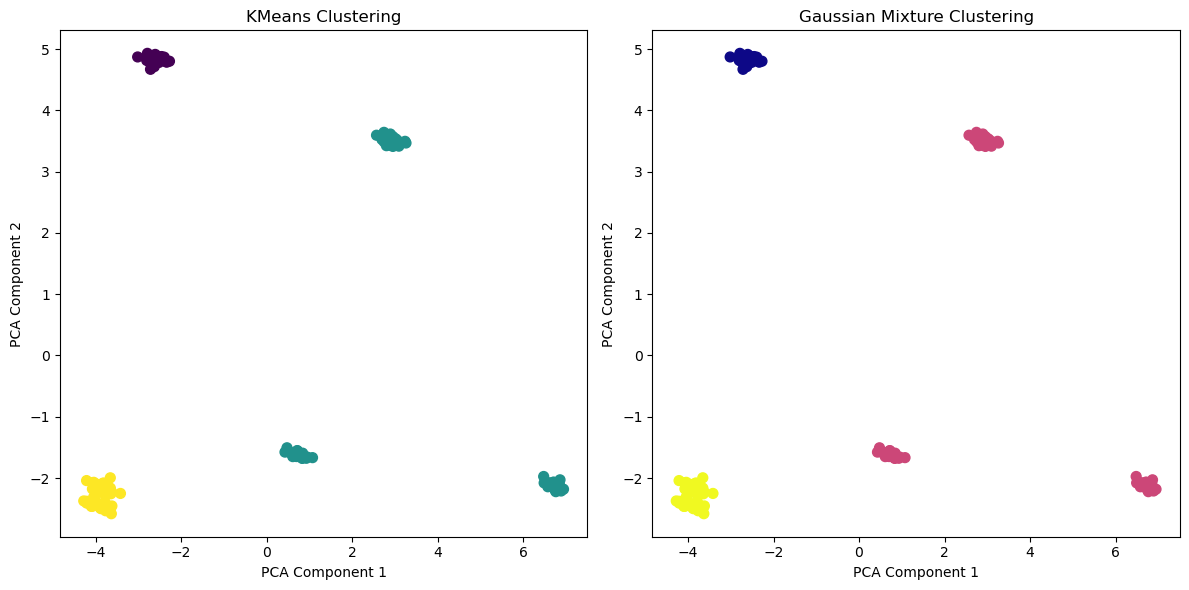

In [297]:
import matplotlib.pyplot as plt

# Visualize PCA result with scatter plot
plt.figure(figsize=(12, 6))

# Visualize KMeans labels with coloring
plt.subplot(1, 2, 1)
plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=labels, cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Visualize GaussianMixture labels with coloring
plt.subplot(1, 2, 2)
plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=labels, cmap='plasma', s=50)
plt.title('Gaussian Mixture Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


- The purpose of this visualization is to compare the clustering results from KMeans and Gaussian Mixture models on the PCA-reduced data. By plotting both clustering results side by side, you can visually assess how the two algorithms group the data and identify any differences in their clustering patterns.